In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Accessing the Final Project folder 
%cd '/content/drive/MyDrive/Georgia Tech/Machine Learning-CS7641/Assignments/Assignment #4'

/content/drive/MyDrive/Georgia Tech/Machine Learning-CS7641/Assignments/Assignment #4


In [ ]:
import gym
import random

In [ ]:
from gym.envs.toy_text import frozen_lake

In [ ]:
frozen_lake_large = frozen_lake.generate_random_map(size=20)
frozen_lake_20_20 = gym.make('FrozenLake-v0', desc=frozen_lake_large, map_name= None, is_slippery=True)

In [ ]:
frozen_lake_20_20.render()


SFHFFFHFHFFFFFFHFFHF
FFFFFFHFFHFHFFFFFFFF
FHHFFHHFFFHHFFFHFFFF
FFFFFFFFFHFFFFHFFFFF
FFFFFFFFFFFFFFFFHFFH
FFHFFFFFFFFHFFFFFFFF
FFFFFHFFFFFFHFFFFFFF
FHFFHFFFFHFFFFHFFFFF
FHFFFFHFFFFFHFFFFFFF
FFFFFHHFFFFFHHFFFHFF
HFFFFFHHHFFFHFHFFFHF
FFFFHFFHFHFFFFFFFFFF
FHFHHFFFFFHFFFFFFFFH
FFFFFHHFFFFHFFFFFFFF
FFHHFFHHFHFFHFFHHHFF
FFFFHFHFFFFFHFFFFFFF
FFFHFFFFFFFFFFFFFFHH
FFFFFFFFHFHFFHFFFFFH
FFFHHFFHHFFHFFFHFFFF
FFFFFFHFFFHFFFFHFFFG


In [ ]:
import gym
import re
import numpy as np



class OpenAI_MDPToolbox:

    """Class to convert Discrete Open AI Gym environemnts to MDPToolBox environments. 
    You can find the list of available gym environments here: https://gym.openai.com/envs/#classic_control
    You'll have to look at the source code of the environments for available kwargs; as it is not well documented.  
    """
    
    def __init__(self, openAI_env_name, render:bool=False, **kwargs):
        """Create a new instance of the OpenAI_MDPToolbox class
        :param openAI_env_name: Valid name of an Open AI Gym env 
        :type openAI_env_name: str
        :param render: whether to render the Open AI gym env
        :type rander: boolean 
        """
        self.env_name = openAI_env_name
    
        # self.env = gym.make(self.env_name, **kwargs)
        self.env = openAI_env_name
        self.env.reset()

        if render:
            self.env.render()
        
        self.transitions = self.env.P
        self.actions = int(re.findall(r'\d+', str(self.env.action_space))[0])
        self.states = int(re.findall(r'\d+', str(self.env.observation_space))[0])
        self.P = np.zeros((self.actions, self.states, self.states))
        self.R = np.zeros((self.states, self.actions))
        self.convert_PR()
        
    def convert_PR(self):
        """Converts the transition probabilities provided by env.P to MDPToolbox-compatible P and R arrays
        """
        for state in range(self.states):
            for action in range(self.actions):
                for i in range(len(self.transitions[state][action])):
                    tran_prob = self.transitions[state][action][i][0]
                    state_ = self.transitions[state][action][i][1]
                    self.R[state][action] += tran_prob*self.transitions[state][action][i][2]
                    self.P[action, state, state_] += tran_prob

In [ ]:
#Converting Openai object to mdptoolbox
frozen_lake_20_20_mdp = OpenAI_MDPToolbox(frozen_lake_20_20)

In [ ]:
#Double Checking  
frozen_lake_20_20_mdp.states

400

In [ ]:
#Retreiving P and R Matrices
P_large = frozen_lake_20_20_mdp.P
R_large = frozen_lake_20_20_mdp.R

In [ ]:
P_large.shape

(4, 400, 400)

In [ ]:
R_large.shape

(400, 4)

In [ ]:
% cd hiivemdptoolbox/

[Errno 2] No such file or directory: 'hiivemdptoolbox/'
/content/drive/MyDrive/Georgia Tech/Machine Learning-CS7641/Assignments/Assignment #4/hiivemdptoolbox


In [ ]:
import hiive.mdptoolbox.example

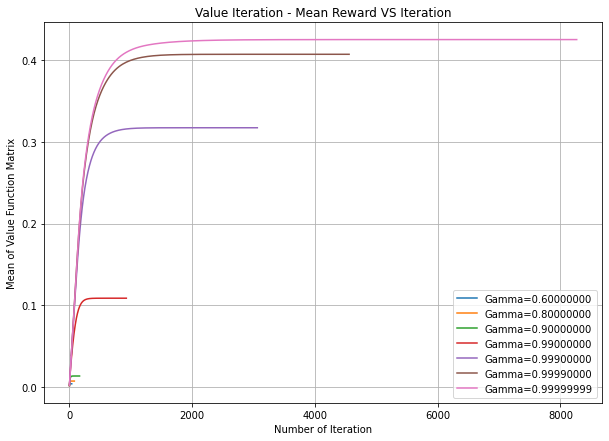

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(10,7))
plt.grid()
Gamma = [0.6, 0.8, 0.9, 0.99, 0.999, 0.9999, 0.99999999]


for g in Gamma:
  vi_frozen_large = hiive.mdptoolbox.mdp.ValueIteration(P_large, R_large, gamma= g, epsilon= 1e-10)
  vi_frozen_large.run()
  df = pd.DataFrame(vi_frozen_large.run_stats)
  plt.plot(df['Iteration'], df['Mean V'], label= 'Gamma={:.8f}'.format(g))


plt.legend(loc= 'best')
# plt.xticks(range(0,500, 5))
plt.xlabel('Number of Iteration')
plt.ylabel('Mean of Value Function Matrix')
plt.title('Value Iteration - Mean Reward VS Iteration')
plt.show()

In [ ]:
#optimal Value Itearation

vi_frozen_large_optimal = hiive.mdptoolbox.mdp.ValueIteration(P_large, R_large, gamma= 0.99999999, epsilon= 1e-10)
vi_frozen_large_optimal.run()

[{'Action': None,
  'Error': 0.3333333333333333,
  'Iteration': 1,
  'Max V': 0.3333333333333333,
  'Mean V': 0.0016666666666666666,
  'Reward': 0.3333333333333333,
  'State': None,
  'Time': 0.0009975433349609375},
 {'Action': None,
  'Error': 0.22222221999999997,
  'Iteration': 2,
  'Max V': 0.4444444433333333,
  'Mean V': 0.003055555541666667,
  'Reward': 0.4444444433333333,
  'State': None,
  'Time': 0.0018742084503173828},
 {'Action': None,
  'Error': 0.11111110888888888,
  'Iteration': 3,
  'Max V': 0.5555555522222222,
  'Mean V': 0.004537036993518518,
  'Reward': 0.5555555522222222,
  'State': None,
  'Time': 0.002564668655395508},
 {'Action': None,
  'Error': 0.11111110777777777,
  'Iteration': 4,
  'Max V': 0.6172839454320986,
  'Mean V': 0.00592592584074074,
  'Reward': 0.6172839454320986,
  'State': None,
  'Time': 0.003178119659423828},
 {'Action': None,
  'Error': 0.09053497580246911,
  'Iteration': 5,
  'Max V': 0.6748971118518517,
  'Mean V': 0.0073353908049382695,
  'Re

In [ ]:
#Optimal Policy
#Optimal Policy
vi_opt_policy = np.reshape(vi_frozen_large_optimal.policy, (20,20))

- 0: LEFT
- 1: DOWN
- 2: RIGHT
- 3: UP

In [ ]:
move_dict = {0: 'L', 1: 'D', 2:'R', 3: 'U'}

In [ ]:
from IPython.core.pylabtools import figsize
def heat_map(matrix, size, title, round = None, move_dict = None, fig_size = 8):
  fig, ax = plt.subplots(figsize=(fig_size,fig_size))
  im = ax.imshow(matrix)

  # Show all ticks and label them with the respective list entries
  ax.set_xticks(np.arange(len(range(size))))
  ax.set_yticks(np.arange(len(range(size))))

  # Loop over data dimensions and create text annotations.
  for i in range(len(range(size))):
      for j in range(len(range(size))):
        if move_dict:
          text = ax.text(j, i, move_dict[matrix[i, j]],
                        ha="center", va="center", color="w")
        else:
          text = ax.text(j, i, np.round(matrix[i, j],round),
                        ha="center", va="center", color="w")

  ax.set_title(title)
  fig.tight_layout()
  plt.show()

In [ ]:
frozen_lake_20_20.render()


SFHFFFHFHFFFFFFHFFHF
FFFFFFHFFHFHFFFFFFFF
FHHFFHHFFFHHFFFHFFFF
FFFFFFFFFHFFFFHFFFFF
FFFFFFFFFFFFFFFFHFFH
FFHFFFFFFFFHFFFFFFFF
FFFFFHFFFFFFHFFFFFFF
FHFFHFFFFHFFFFHFFFFF
FHFFFFHFFFFFHFFFFFFF
FFFFFHHFFFFFHHFFFHFF
HFFFFFHHHFFFHFHFFFHF
FFFFHFFHFHFFFFFFFFFF
FHFHHFFFFFHFFFFFFFFH
FFFFFHHFFFFHFFFFFFFF
FFHHFFHHFHFFHFFHHHFF
FFFFHFHFFFFFHFFFFFFF
FFFHFFFFFFFFFFFFFFHH
FFFFFFFFHFHFFHFFFFFH
FFFHHFFHHFFHFFFHFFFF
FFFFFFHFFFHFFFFHFFFG


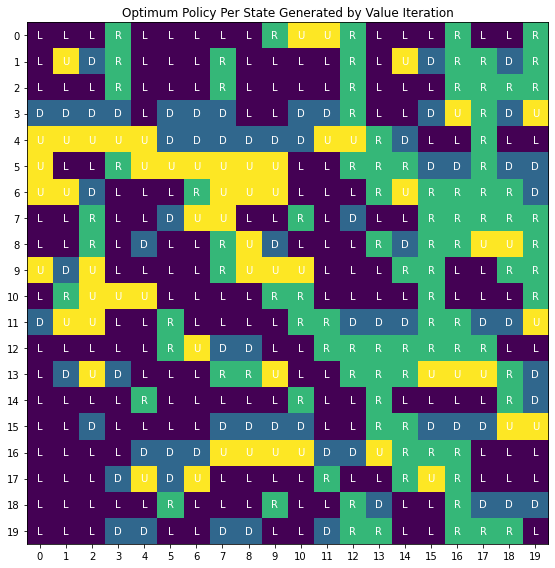

In [ ]:
heat_map(vi_opt_policy, 20, "Optimum Policy Per State Generated by Value Iteration" ,move_dict= move_dict)

In [ ]:
#Value function of optimal Policy
vi_opt_value = np.reshape(vi_frozen_large_optimal.V, (20,20))

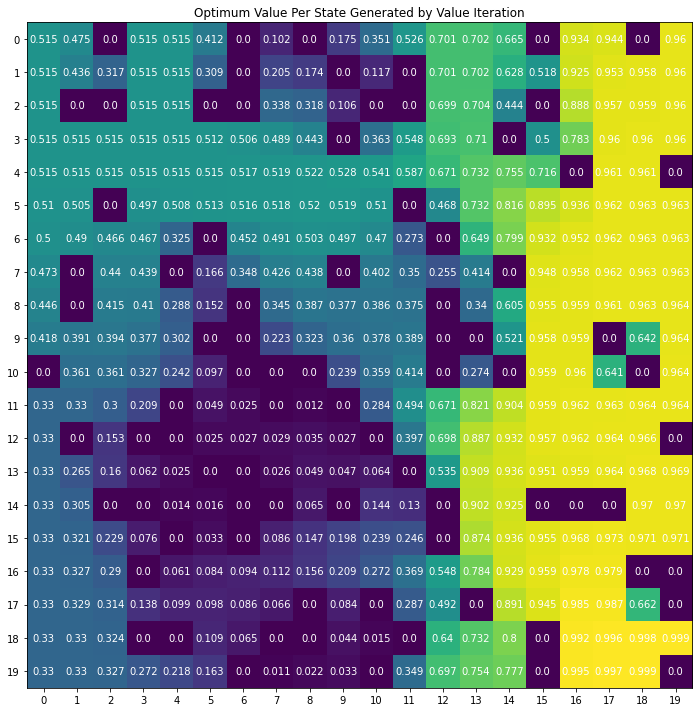

In [ ]:
heat_map(vi_opt_value, 20, "Optimum Value Per State Generated by Value Iteration", round= 3, fig_size=10)

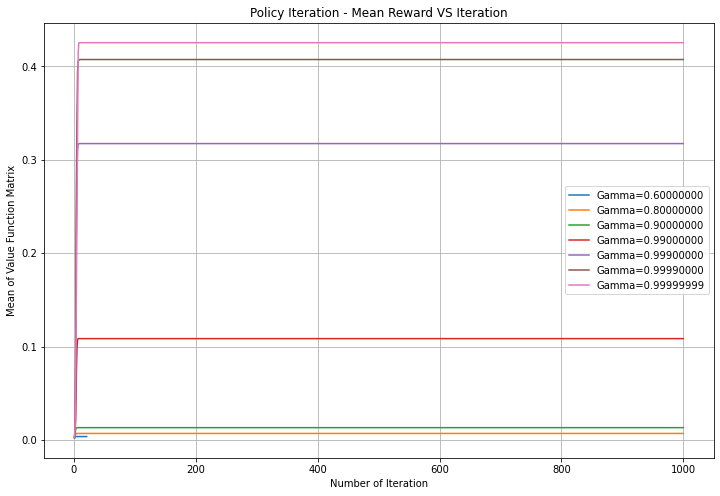

In [ ]:
#Policy Iteration

figure(figsize=(12,8))
plt.grid()
Gamma = [0.6, 0.8, 0.9, 0.99, 0.999, 0.9999, 0.99999999]


for g in Gamma:
  pi_frozen_large = hiive.mdptoolbox.mdp.PolicyIteration(P_large, R_large, gamma= g)
  pi_frozen_large.run()
  df_pi = pd.DataFrame(pi_frozen_large.run_stats)
  plt.plot(df_pi['Iteration'], df_pi['Mean V'], label= 'Gamma={:.8f}'.format(g))


plt.legend(loc= 'best')
plt.xlabel('Number of Iteration')
# plt.xticks(range(0, 100))
plt.ylabel('Mean of Value Function Matrix')
plt.title('Policy Iteration - Mean Reward VS Iteration')
plt.show()

In [ ]:
#Optimal Policy Iteration
pi_frozen_large_optimal = hiive.mdptoolbox.mdp.PolicyIteration(P_large, R_large, gamma= 0.99999999)
pi_frozen_large_optimal.run()

[{'Action': None,
  'Error': 0.16666666416666664,
  'Iteration': 1,
  'Max V': 0.49999999749999996,
  'Mean V': 0.0028645833102864584,
  'Reward': 0.49999999749999996,
  'State': None,
  'Time': 0.006450176239013672,
  'V[0]': -3.9272747526018075e-90},
 {'Action': None,
  'Error': 0.14455839373453452,
  'Iteration': 2,
  'Max V': 0.8346013779000181,
  'Mean V': 0.01512942677758358,
  'Reward': 0.8346013779000181,
  'State': None,
  'Time': 0.013187646865844727,
  'V[0]': -1.0456191868181787e-36},
 {'Action': None,
  'Error': 0.03461077393776957,
  'Iteration': 3,
  'Max V': 0.959771329818563,
  'Mean V': 0.0810091632560909,
  'Reward': 0.959771329818563,
  'State': None,
  'Time': 0.019555330276489258,
  'V[0]': 0.0037713967954014593},
 {'Action': None,
  'Error': 0.03737106146949776,
  'Iteration': 4,
  'Max V': 0.9951182534366114,
  'Mean V': 0.15137385847399487,
  'Reward': 0.9951182534366114,
  'State': None,
  'Time': 0.026058673858642578,
  'V[0]': 0.07595380546389885},
 {'Action

In [ ]:
#Optimal Policy
pi_opt_policy = np.reshape(pi_frozen_large_optimal.policy, (20,20))

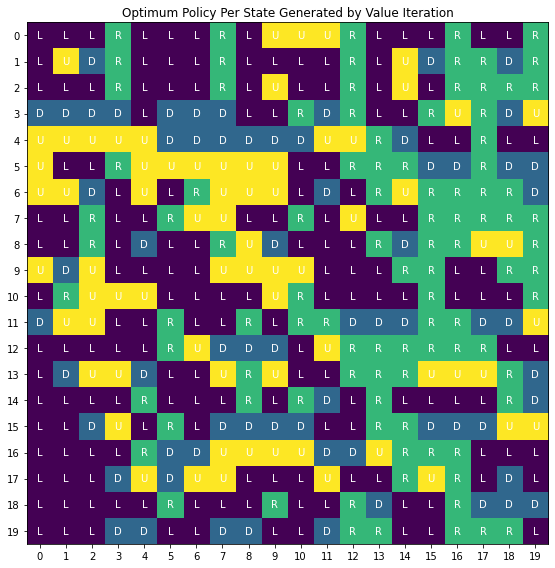

In [ ]:
heat_map(pi_opt_policy, 20, "Optimum Policy Per State Generated by Value Iteration" ,move_dict= move_dict)

In [ ]:
#Value function of optimal Policy
pi_opt_value = np.reshape(pi_frozen_large_optimal.V, (20,20))

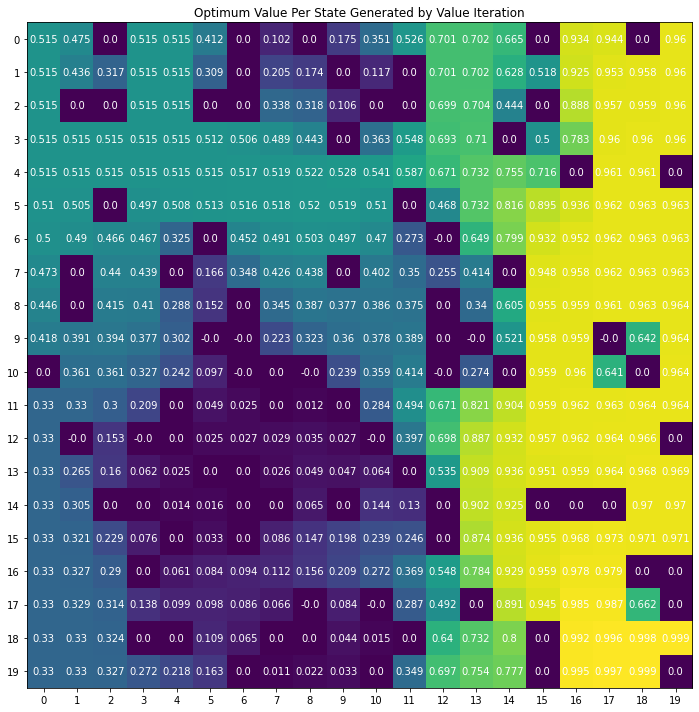

In [ ]:
heat_map(pi_opt_value, 20, "Optimum Value Per State Generated by Value Iteration", round= 3, fig_size= 10)

In [ ]:
# Checking If Policies generated by VI and PI are same
vi_frozen_large_optimal.policy == pi_frozen_large_optimal.policy

False

In [ ]:
res = tuple(map(lambda i, j: i - j, vi_frozen_large_optimal.policy,pi_frozen_large_optimal.policy)) 
#Finding the states which policy differs 

non_zero_index = np.nonzero(res)[0]

print(f'States which policy is differ {non_zero_index}')

States which policy is differ [  7   9  49  54  70  75 124 131 145 152 187 209 228 249 251 263 264 267
 288 291 303 305 324 347 351 358]


- 0: LEFT
- 1: DOWN
- 2: RIGHT
- 3: UP

In [ ]:
print(f'Action taken in 54th state in based on Value Iteration generated policy: {vi_frozen_large_optimal.policy[54]}')
print(f'Action taken in 54th state in based on Policy Iteration generated policy: {pi_frozen_large_optimal.policy[54]}')

print(f'\nAction taken in 358th state in based on Value Iteration generated policy: {vi_frozen_large_optimal.policy[358]}')
print(f'Action taken in 358th state in based on Policy Iteration generated policy: {pi_frozen_large_optimal.policy[358]}')

Action taken in 54th state in based on Value Iteration generated policy: 0
Action taken in 54th state in based on Policy Iteration generated policy: 3

Action taken in 358th state in based on Value Iteration generated policy: 0
Action taken in 358th state in based on Policy Iteration generated policy: 1


In [ ]:
different_policy = np.reshape(res, (20,20))

In [ ]:
diff_move = {0: 'S', -1: 'D', -2: 'D', -3:'D', 1: 'D', 2:'D'}

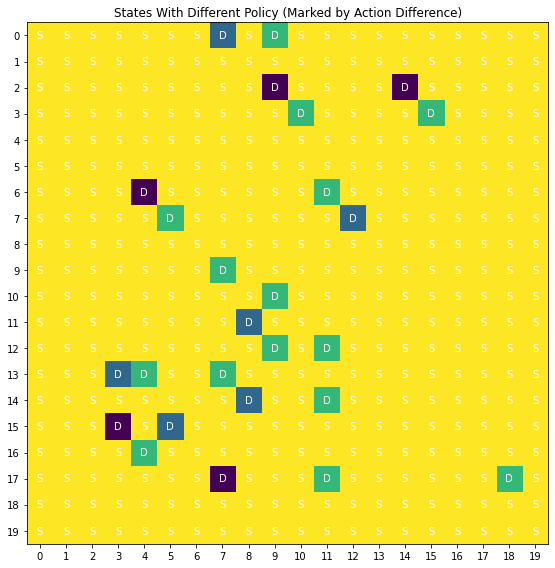

In [ ]:
heat_map(different_policy, 20, 'States With Different Policy (Marked by Action Difference)', move_dict= diff_move)

In [ ]:
df_vi_optim_small = pd.DataFrame(vi_frozen_large_optimal.run_stats)
df_pi_optim_small = pd.DataFrame(pi_frozen_large_optimal.run_stats)

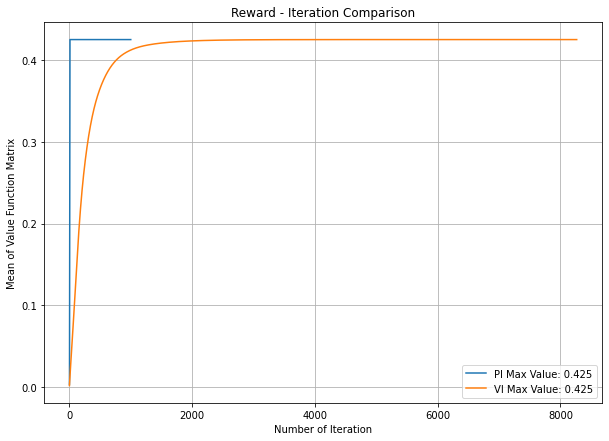

In [ ]:
figure(figsize=(10,7))
plt.grid()

plt.plot(df_pi_optim_small['Iteration'], df_pi_optim_small['Mean V'], label ='PI Max Value: {:0.3f}'.format(df_pi_optim_small['Mean V'].max()))
plt.plot(df_vi_optim_small['Iteration'], df_vi_optim_small['Mean V'], label ='VI Max Value: {:0.3f}'.format(df_vi_optim_small['Mean V'].max()))
plt.legend(loc='best')
plt.xlabel('Number of Iteration')
plt.ylabel('Mean of Value Function Matrix')
plt.title('Reward - Iteration Comparison')
plt.show()

In [ ]:
import math
def learning_rate_decay(n , min_rate = 0.01, decay_division = 25):
  """Decaying Learning rate"""
  return max(min_rate, min(1, 1 - math.log10(n + 1)/decay_division))

In [ ]:
#Q Learning
import random
import time

def q_learning(env, action_space_size, state_space_size, num_episodes = 100000, 
               max_steps_per_episodes = 400, gamma = 0.99, learning_rate_decay_division = 25,  exploration_rate = 1,
               max_exploration_rate = 1, min_exploration_rate = 0.01, exploration_decay_rate = 0.00005, per_x_eposide_decay = None, exploration_decay = True):
  
  steps_list = []
  rewards_all_episodes = []
  #Initiate q table 
  q_table = np.zeros((state_space_size, action_space_size))

  for episode in range(num_episodes):
    # print(f'#### EPISODE {episode} #####')
    state = env.reset()
    # env.render()
    # time.sleep(0.1)
    agent_step = 0
    done = False
    rewards_current_episode = 0

    for step in range(max_steps_per_episodes):

      #Exploration - Exploitation trade-off

      exploration_rate_threshold = random.uniform(0, 1)
      if exploration_rate_threshold > exploration_rate:
        action = np.argmax(q_table[state, :])
      else:
        action = env.action_space.sample()
      
      new_state, reward, done, info = env.step(action)

      # env.render()
      # time.sleep(0.1)

      if done:
        if new_state != 63:
          reward = - 10
        else:
          reward = 100

      agent_step += 1

      #Update Q table
      learning_rate = learning_rate_decay(episode, decay_division= learning_rate_decay_division)
      # print(f'learning rate: {learning_rate}')
      q_table[state, action] = q_table[state, action] * (1 - learning_rate) + learning_rate * (reward + gamma * np.max(q_table[new_state, :]))

      state = new_state

      rewards_current_episode += reward

      if done == True:
        steps_list.append(agent_step)
        break

    if exploration_decay: 
      if per_x_eposide_decay:
        if episode % per_x_eposide_decay == 0:
          exploration_rate = min_exploration_rate + \
          (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate * episode)
      else:
          exploration_rate = min_exploration_rate + \
          (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate * episode)
          # print(f'exploration rate: {exploration_rate}')
      rewards_all_episodes.append(rewards_current_episode)
    
  return rewards_all_episodes, steps_list, q_table




In [ ]:
def X_per_y_episodes(X_list, y, num_episodes=200000):
  x_list = []
  X_per_y_episodes_list = np.split(np.array(X_list), num_episodes/y)
  for r in X_per_y_episodes_list:
    x_list.append(sum(r/y))
  
  return x_list

In [ ]:
action_space_size = frozen_lake_20_20.action_space.n
state_space_size = frozen_lake_20_20.observation_space.n

In [ ]:
reward, agent_step, q_t_n = q_learning(frozen_lake_20_20, action_space_size=action_space_size, state_space_size = state_space_size, per_x_eposide_decay = 20)

In [ ]:
reward_list = X_per_y_episodes(reward, y=1000)

In [ ]:
reward_list

[-9.999999999999831,
 -9.999999999999831,
 -9.999999999999831,
 -9.999999999999831,
 -9.999999999999831,
 -9.999999999999831,
 -9.999999999999831,
 -9.999999999999831,
 -9.999999999999831,
 -9.999999999999831,
 -9.999999999999831,
 -9.999999999999831,
 -9.999999999999831,
 -9.999999999999831,
 -9.999999999999831,
 -9.999999999999831,
 -9.999999999999831,
 -9.999999999999831,
 -9.999999999999831,
 -9.999999999999831,
 -9.889999999999832,
 -9.999999999999831,
 -9.999999999999831,
 -9.999999999999831,
 -9.999999999999831,
 -9.999999999999831,
 -9.999999999999831,
 -9.999999999999831,
 -9.999999999999831,
 -9.999999999999831,
 -9.999999999999831,
 -9.999999999999831,
 -9.889999999999832,
 -9.999999999999831,
 -9.669999999999833,
 -9.889999999999834,
 -9.889999999999832,
 -9.889999999999832,
 -9.999999999999831,
 -9.999999999999831,
 -9.889999999999832,
 -9.669999999999835,
 -9.779999999999832,
 -9.779999999999832,
 -9.669999999999835,
 -9.889999999999834,
 -9.669999999999833,
 -9.779999999

In [ ]:
step_taken = X_per_y_episodes(agent_step, y=1000)
step_taken

[10.635999999999964,
 11.003999999999957,
 11.154999999999953,
 11.664999999999981,
 13.477999999999973,
 13.19299999999997,
 14.375999999999966,
 14.679999999999962,
 15.099999999999985,
 16.099999999999962,
 16.326999999999977,
 17.834000000000003,
 19.318999999999992,
 19.13699999999996,
 20.725000000000005,
 21.096000000000004,
 22.342999999999986,
 23.26799999999999,
 24.813000000000017,
 24.885999999999967,
 26.62300000000003,
 17.707999999999995,
 19.64399999999999,
 21.521999999999984,
 22.93999999999997,
 23.71299999999999,
 24.052999999999987,
 26.69500000000004,
 26.929999999999993,
 29.53100000000003,
 31.04900000000001,
 31.980000000000015,
 31.043,
 28.567000000000014,
 31.241000000000007,
 29.84699999999999,
 34.27900000000002,
 36.93900000000008,
 37.38900000000009,
 34.09600000000009,
 34.169000000000096,
 36.21000000000006,
 38.98500000000005,
 38.80900000000007,
 39.08100000000009,
 33.77300000000004,
 38.207000000000114,
 39.476000000000134,
 36.108000000000075,
 41

Text(0.5, 1.0, 'Reward VS 1000 episodes')

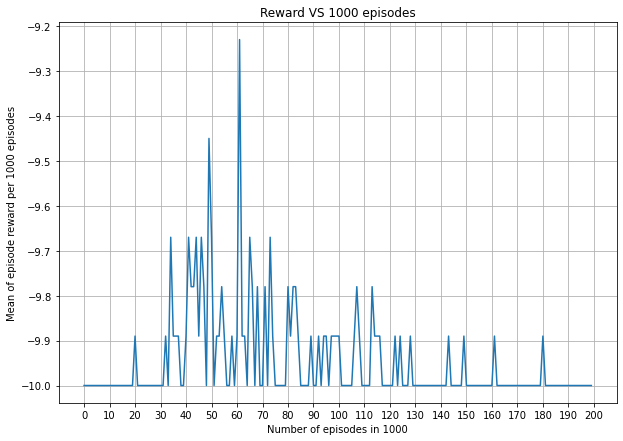

In [ ]:
figure(figsize=(10,7))
plt.grid()

plt.plot(range(len(reward_list)), reward_list)
plt.xlabel('Number of episodes in 1000')
plt.xticks(range(0, len(reward_list)+1, 10))
plt.ylabel('Mean of episode reward per 1000 episodes')
plt.title('Reward VS 1000 episodes')

Text(0.5, 1.0, 'steps VS 1000 episodes')

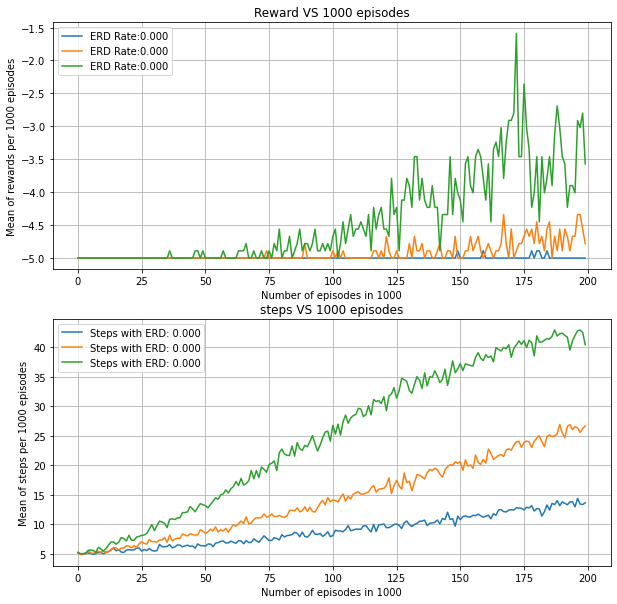

In [ ]:
#Hyper-Parameters Tuning
import seaborn as sns
fig, ax = plt.subplots(2, 1, figsize=(10,10))


ax[0].grid()
ax[1].grid()

exploration_decay_rate_list = [0.00001, 0.00002, 0.00004]

for erd in exploration_decay_rate_list:
  reward_h, agent_step_h, q_table_h = q_learning(frozen_lake_20_20, action_space_size=action_space_size, state_space_size = state_space_size, exploration_decay_rate= erd, learning_rate_decay_division=0.1, gamma= 0.9, per_x_eposide_decay= 2000)
  reward_list_h = X_per_y_episodes(reward_h, y=1000)
  steps_taken_h = X_per_y_episodes(agent_step_h, y=1000)
  r = sns.lineplot(x = range(len(reward_list_h)), y = reward_list_h, label='ERD Rate:{:0.3f}'.format(erd), ax = ax[0])
  s = sns.lineplot(x = range(len(steps_taken_h)), y = steps_taken_h, label='Steps with ERD: {:0.3f}'.format(erd), ax = ax[1])


ax[0].legend(loc='best')
ax[1].legend(loc='best')


r.set_xlabel('Number of episodes in 1000')
r.set_ylabel('Mean of rewards per 1000 episodes')
r.set_title('Reward VS 1000 episodes')

s.set_xlabel('Number of episodes in 1000')
s.set_ylabel('Mean of steps per 1000 episodes')
s.set_title('steps VS 1000 episodes')


Text(0.5, 1.0, 'steps VS 1000 episodes')

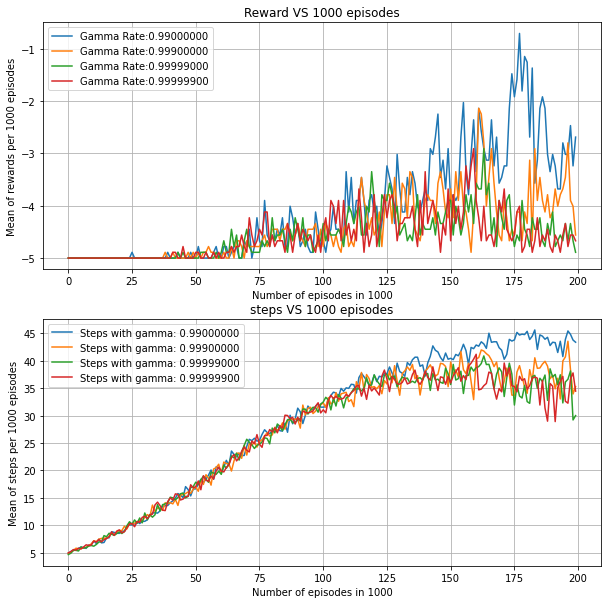

In [ ]:
#Hyper-Parameters Tuning
import seaborn as sns
fig, ax = plt.subplots(2, 1, figsize=(10,10))


ax[0].grid()
ax[1].grid()


gamma_list = [0.99, 0.999, 0.99999, 0.999999]

for g in gamma_list:
  reward_h, agent_step_h, q_table_h = q_learning(frozen_lake_20_20, action_space_size=action_space_size, state_space_size = state_space_size, gamma = g, learning_rate_decay_division= 1)
  reward_list_h = X_per_y_episodes(reward_h, y=1000)
  steps_taken_h = X_per_y_episodes(agent_step_h, y=1000)
  r = sns.lineplot(x = range(len(reward_list_h)), y = reward_list_h, label='Gamma Rate:{:0.8f}'.format(g), ax = ax[0])
  s = sns.lineplot(x = range(len(steps_taken_h)), y = steps_taken_h, label='Steps with gamma: {:0.8f}'.format(g), ax = ax[1])


ax[0].legend(loc='best')
ax[1].legend(loc='best')


r.set_xlabel('Number of episodes in 1000')
r.set_ylabel('Mean of rewards per 1000 episodes')
r.set_title('Reward VS 1000 episodes')

s.set_xlabel('Number of episodes in 1000')
s.set_ylabel('Mean of steps per 1000 episodes')
s.set_title('steps VS 1000 episodes')


Text(0.5, 1.0, 'steps VS 1000 episodes')

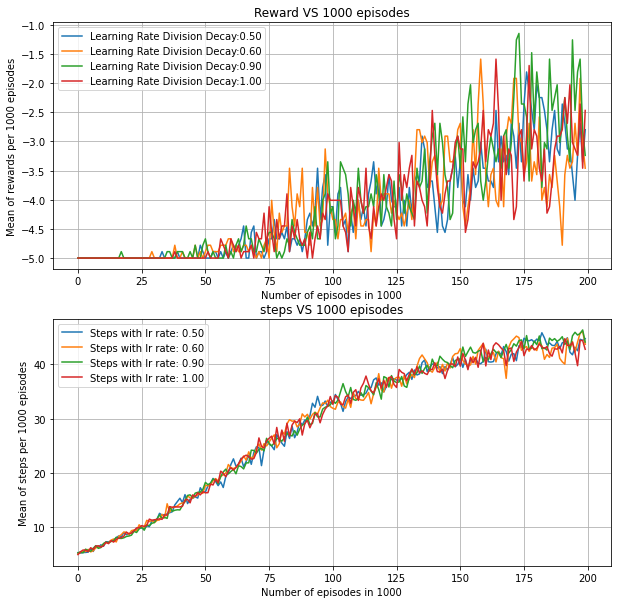

In [ ]:
from numpy.random.mtrand import gamma
#Hyper-Parameters Tuning
import seaborn as sns
fig, ax = plt.subplots(2, 1, figsize=(10,10))


ax[0].grid()
ax[1].grid()


learning_rate_decay_list = [0.5, 0.6, 0.9,1]

for lr in learning_rate_decay_list:
  reward_h, agent_step_h, q_table_h = q_learning(frozen_lake_20_20, action_space_size=action_space_size, state_space_size = state_space_size, learning_rate_decay_division= lr, per_x_eposide_decay=100)
  reward_list_h = X_per_y_episodes(reward_h, y=1000)
  steps_taken_h = X_per_y_episodes(agent_step_h, y=1000)
  r = sns.lineplot(x = range(len(reward_list_h)), y = reward_list_h, label='Learning Rate Division Decay:{:0.2f}'.format(lr), ax = ax[0])
  s = sns.lineplot(x = range(len(steps_taken_h)), y = steps_taken_h, label='Steps with lr rate: {:0.2f}'.format(lr), ax = ax[1])


ax[0].legend(loc='best')
ax[1].legend(loc='best')


r.set_xlabel('Number of episodes in 1000')
r.set_ylabel('Mean of rewards per 1000 episodes')
r.set_title('Reward VS 1000 episodes')

s.set_xlabel('Number of episodes in 1000')
s.set_ylabel('Mean of steps per 1000 episodes')
s.set_title('steps VS 1000 episodes')

In [ ]:
reward_optimal, agent_step_optimal = q_learning(frozen_lake_20_20, action_space_size=action_space_size, state_space_size = state_space_size, learning_rate_decay_division= 3, gamma=0.9999999)

In [ ]:
from collections import Counter
Counter(reward_optimal)

Counter({-10.0: 171222, 100.0: 28778})

In [ ]:
reward_list_optimal = X_per_y_episodes(reward_optimal, y=1000, num_episodes= 80000)

In [ ]:
step_list_optimal = X_per_y_episodes(agent_step_optimal, y=1000, num_episodes= 80000)

Text(0.5, 1.0, 'steps VS 1000 episodes')

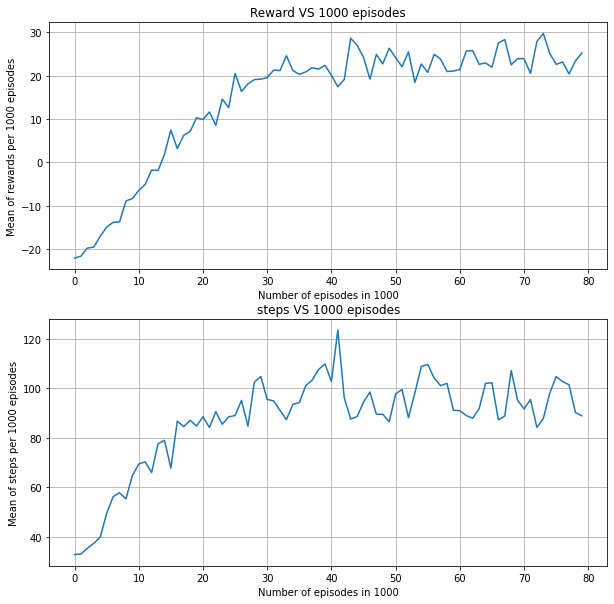

In [ ]:
import seaborn as sns
fig, ax = plt.subplots(2, 1, figsize=(10,10))


ax[0].grid()
ax[1].grid()

r = sns.lineplot(x = range(len(reward_list_optimal)), y = reward_list_optimal, ax = ax[0])
s = sns.lineplot(x = range(len(step_list_optimal)), y = step_list_optimal, ax = ax[1])

r.set_xlabel('Number of episodes in 1000')
r.set_ylabel('Mean of rewards per 1000 episodes')
r.set_title('Reward VS 1000 episodes')

s.set_xlabel('Number of episodes in 1000')
s.set_ylabel('Mean of steps per 1000 episodes')
s.set_title('steps VS 1000 episodes')